In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18

### Part 1. Population model. 
#### Assumptions: 7% of the population has true RIF, 60% chance of success for remainder of population in each round of IVF. 

In [9]:
maxRounds = 10
trueRIF = 0.07
nonRIFsuccessRate =0.60
nrounds = np.arange(0,maxRounds+1)

nonRIFprobOfSuccessAfterN = 1-(1-nonRIFsuccessRate)**nrounds
totalProbOfSuccessAfterN = (1-trueRIF)*nonRIFprobOfSuccessAfterN
fractionRIFAfterN = trueRIF/(1-totalProbOfSuccessAfterN)

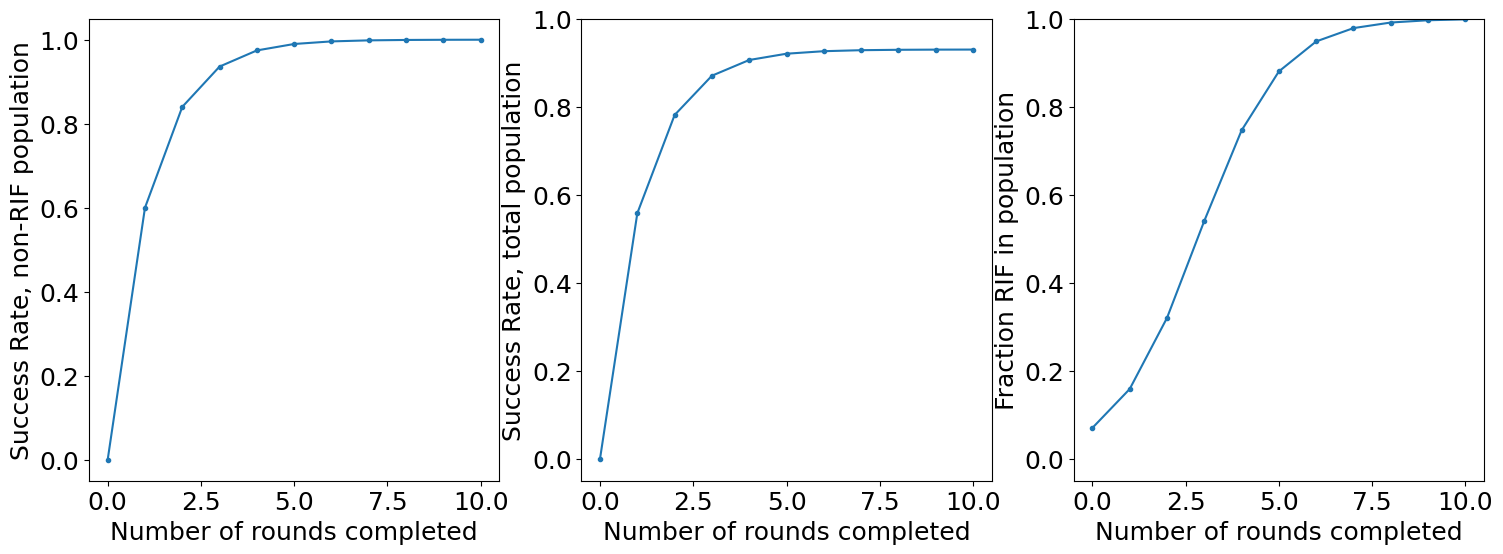

In [23]:
fig,axs = plt.subplots(1,3,figsize = (18,6))
axs[0].plot(nrounds,nonRIFprobOfSuccessAfterN,'.-')
axs[0].set_xlabel('Number of rounds completed')
axs[0].set_ylabel('Success Rate, non-RIF population');

axs[1].plot(nrounds,totalProbOfSuccessAfterN,'.-')
axs[1].set_xlabel('Number of rounds completed')
axs[1].set_ylabel('Success Rate, total population');
axs[1].set_ylim([-0.05,1]);

axs[2].plot(nrounds,fractionRIFAfterN,'.-')
axs[2].set_xlabel('Number of rounds completed')
axs[2].set_ylabel('Fraction RIF in population');
axs[2].set_ylim([-0.05,1]);

### Part 2, expected RIF numbers in Simbryo assay. 

#### Assumptions: 100 patients, vary the numbers of those who have had 1,2,3 previous failures. 

#### First assume we recruit fraction F with 1 previous failure, same fraction with 2 previous failures. No previous 3 failures.


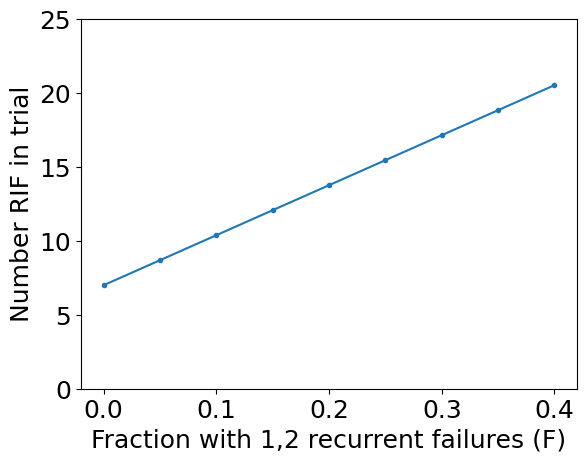

In [44]:
nPatients = 100

Fvals = np.arange(0,0.45,0.05)
RIF = nPatients*((1-2*Fvals)*fractionRIFAfterN[0]+Fvals*fractionRIFAfterN[1]+Fvals*fractionRIFAfterN[2])

plt.plot(Fvals,RIF,'.-')
plt.xlabel('Fraction with 1,2 recurrent failures (F)')
plt.ylabel('Number RIF in trial')
plt.ylim([0,25]);

#### Assume we can recruit fraction F with 1 previous failure, same with 2 previous failures, F/4 with three previous failures

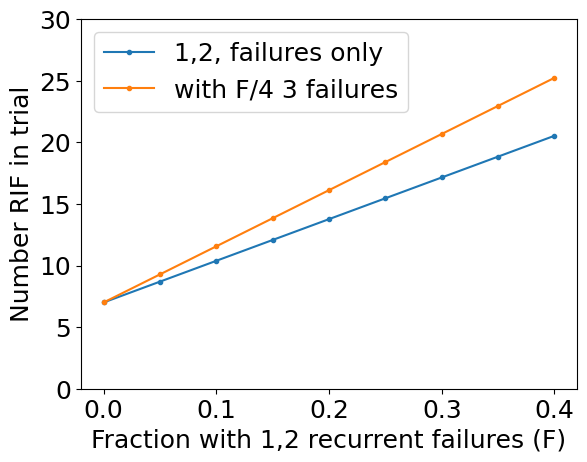

In [47]:
Fvals = np.arange(0,0.45,0.05)
RIF_upTo3 = nPatients*((1-2*Fvals-Fvals/4)*fractionRIFAfterN[0]+Fvals*fractionRIFAfterN[1]+Fvals*fractionRIFAfterN[2]+Fvals/4*fractionRIFAfterN[3])

plt.plot(Fvals,RIF,'.-',label = "1,2, failures only")
plt.plot(Fvals,RIF_upTo3,'.-', label = "with F/4 3 failures")
plt.xlabel('Fraction with 1,2 recurrent failures (F)')
plt.ylabel('Number RIF in trial')
plt.ylim([0,30]);
plt.legend();


#### Independently vary numbers of 1,2 failures, no 3 failures:

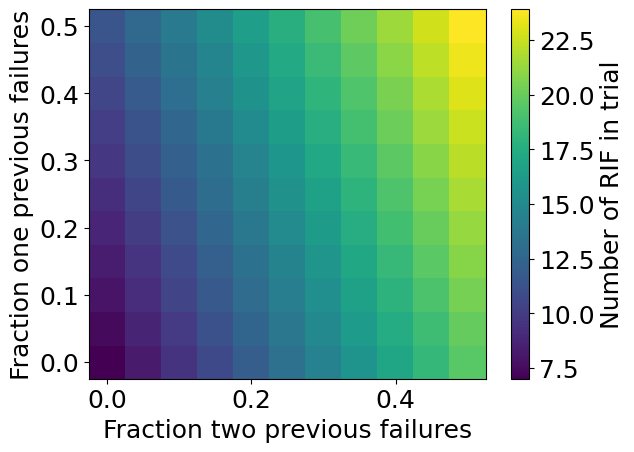

In [48]:
nPatients = 100
nprev = np.arange(0,0.55,0.05)

RIFnumber = np.zeros((len(nprev),len(nprev)))

for ii, one_prev in enumerate(nprev):
    for jj, two_prev in enumerate(nprev):
        total_one = one_prev*nPatients
        total_two = two_prev*nPatients
        total_zero = nPatients-total_one-total_two
        RIFnumber[ii,jj] = total_zero*fractionRIFAfterN[0]+total_one*fractionRIFAfterN[1]+total_two*fractionRIFAfterN[2]

plt.pcolor(nprev,nprev,RIFnumber)
plt.colorbar(label = 'Number of RIF in trial');
plt.xlabel('Fraction two previous failures')
plt.ylabel('Fraction one previous failures');

#### Fraction of 1,2 failures are the same, indendently vary number of 3 failures:

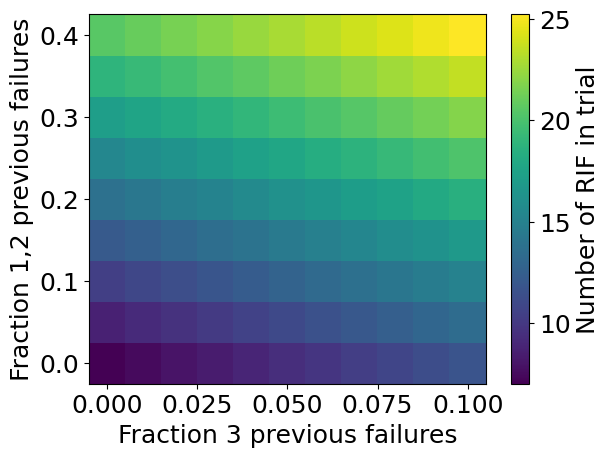

In [54]:
nPatients = 100
nprev = np.arange(0,0.45,0.05)
nprev3 = np.arange(0,0.11,0.01)

RIFnumber = np.zeros((len(nprev),len(nprev3)))

for ii, one_prev in enumerate(nprev):
    for jj, three_prev in enumerate(nprev3):
        total_one = one_prev*nPatients
        total_two = one_prev*nPatients
        total_three = three_prev*nPatients
        total_zero = nPatients-total_one-total_two-total_three
        RIFnumber[ii,jj] = total_zero*fractionRIFAfterN[0]+total_one*fractionRIFAfterN[1]+total_two*fractionRIFAfterN[2]+total_three*fractionRIFAfterN[3]

plt.pcolor(nprev3,nprev,RIFnumber)
plt.colorbar(label = 'Number of RIF in trial');
plt.xlabel('Fraction 3 previous failures')
plt.ylabel('Fraction 1,2 previous failures');

### Part 3, modeling of simbryo specificity and sensitivity.

#### Assume R true RIF patients, 100 total patients, 50% probability of detecting true RIF. 5% positive rate in remainder of population (false positive). Here Simbryo Positive means that the test indicated implantation would fail: 

Text(0, 0.5, 'Specificity')

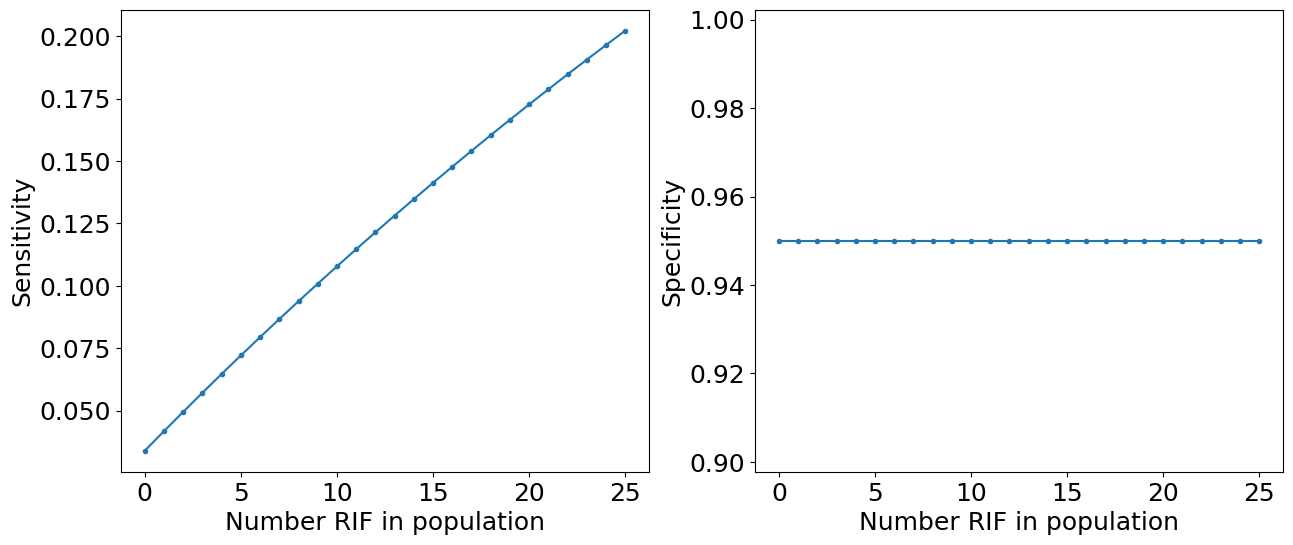

In [67]:
nPatients = 100
nonRIFsuccessRate =0.60
pDetectTrueRIF = 0.5

pFalsePositive = 0.05 

R = np.arange(26)
totalNotPregnant = R + (nPatients-R)*(1-nonRIFsuccessRate)
totalNotPregnantSimbryoPositive = R*pDetectTrueRIF+(nPatients-R)*(1-nonRIFsuccessRate)*pFalsePositive
totalNotPregnantSimbryoNegative = R*(1-pDetectTrueRIF)+(nPatients-R)*nonRIFsuccessRate*(1-pFalsePositive)

totalPregnant = (nPatients-R)*nonRIFsuccessRate
totalPregnantSimbryoPositive = totalPregnant*pFalsePositive
totalPregnantSimbryoNegative = totalPregnant*(1-pFalsePositive)

sensitivity = totalNotPregnantSimbryoPositive/(totalNotPregnantSimbryoNegative+totalNotPregnantSimbryoPositive)
specificity = totalPregnantSimbryoNegative/(totalPregnantSimbryoNegative+totalPregnantSimbryoPositive)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].plot(R,sensitivity,'.-')
axs[0].set_xlabel('Number RIF in population')
axs[0].set_ylabel('Sensitivity')

axs[1].plot(R,specificity,'.-')
axs[1].set_xlabel('Number RIF in population')
axs[1].set_ylabel('Specificity')

Text(0, 0.5, 'Negative predictive value')

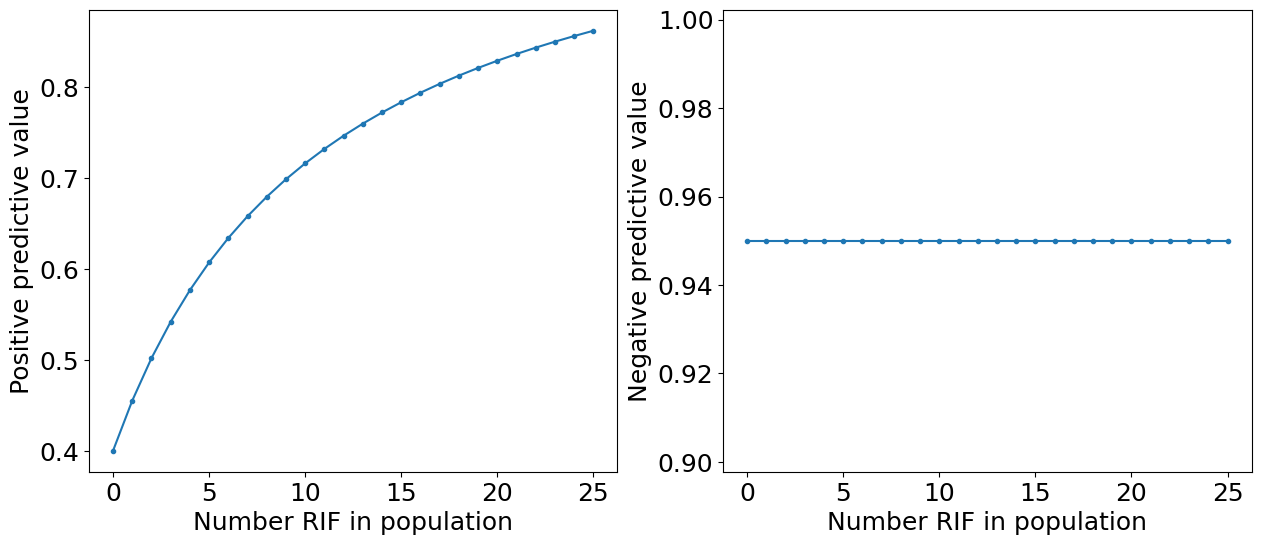

In [68]:
ppv = totalNotPregnantSimbryoPositive/(totalPregnantSimbryoPositive+totalNotPregnantSimbryoPositive)
npv = totalPregnantSimbryoNegative/(totalNotPregnantSimbryoNegative+totalPregnantSimbryoNegative)

fig, axs = plt.subplots(1,2,figsize = (15,6))
axs[0].plot(R,ppv,'.-')
axs[0].set_xlabel('Number RIF in population')
axs[0].set_ylabel('Positive predictive value')

axs[1].plot(R,specificity,'.-')
axs[1].set_xlabel('Number RIF in population')
axs[1].set_ylabel('Negative predictive value')